# View GCaMP mismatch regular and closed loop data

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import pearsonr, spearmanr
from analysis_functions import *
from model_functions import *
import matplotlib.patches as patches
import seaborn as sns

In [349]:
RunTresholdDict = {'B3M1': 145, 'B3M2': 295, 'B3M3': 325, 'B2M4': 110, 'B2M5': 180}

In [350]:
GCaMP_Reg_1 = pd.read_csv('GCaMP_MMclosed_regular_session1.csv')#, dtype=dtype_dict)
GCaMP_Reg_2 = pd.read_csv('GCaMP_MMclosed_regular_session2.csv')#, dtype=dtype_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'GCaMP_MMclosed_regular_session1.csv'

In [11]:
#Make sure the index provides inforamtion of seconds since start
GCaMP_Reg_1.set_index('Seconds', inplace=True)
GCaMP_Reg_2.set_index('Seconds', inplace=True)

In [12]:
#Have a look that the data is as expected
GCaMP_Reg_1

,470_dfF,movementX,movementY,event,ExperimentEvents,Experiment,Session,mouseID,sex,area,No_halt,LinearMismatch_block,LinearRegularMismatch_block,LinearNormal_block
Seconds,,,,,,,,,,,,,,
0.000,-0.000021,1.411287e-03,0.000578,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.001,-0.000067,4.547482e-03,0.001861,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.002,-0.000113,6.272389e-03,0.002336,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.003,-0.000159,6.272389e-03,0.001823,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.004,-0.000205,6.272389e-03,0.001309,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992.723,5.189932,1.729690e-05,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False
1992.724,5.186361,1.255802e-05,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False
1992.725,5.182791,7.819145e-06,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False


In [13]:
# Chaning event name to halt and making it so that its True when there is a halt
#GCaMP_Reg_1.loc[:, 'event'] = GCaMP_Reg_1['event'].replace({False: True, True: False})
GCaMP_Reg_1.rename(columns = {'event': 'halt'}, inplace = True)
GCaMP_Reg_2.rename(columns = {'event': 'halt'}, inplace = True)

In [14]:
#Check that the same mice are in the datsets
print(GCaMP_Reg_1.mouseID.unique())
print(GCaMP_Reg_2.mouseID.unique())


['B2M4' 'B2M5' 'B3M1' 'B3M2' 'B3M3']
['B2M4' 'B2M5' 'B3M1' 'B3M2']


## View session data
- Loop through the mouse names present in one of the dataframes (ideally they should be the same)
- save a variable where each session is saved for the current mouse
- use the view_session_mouse() funciton from analysis_functions.py to plot the Delta F/F 470 fluorescence and movement in X direction with halts in grey, and session blocks marked in colors.
- Edit the function to plot different fluorescence traces, movements, and eyes.
- This is mostly to get an impression of the overall data trends.

Move the function into this file to test it.



Plotted traces for B2M4


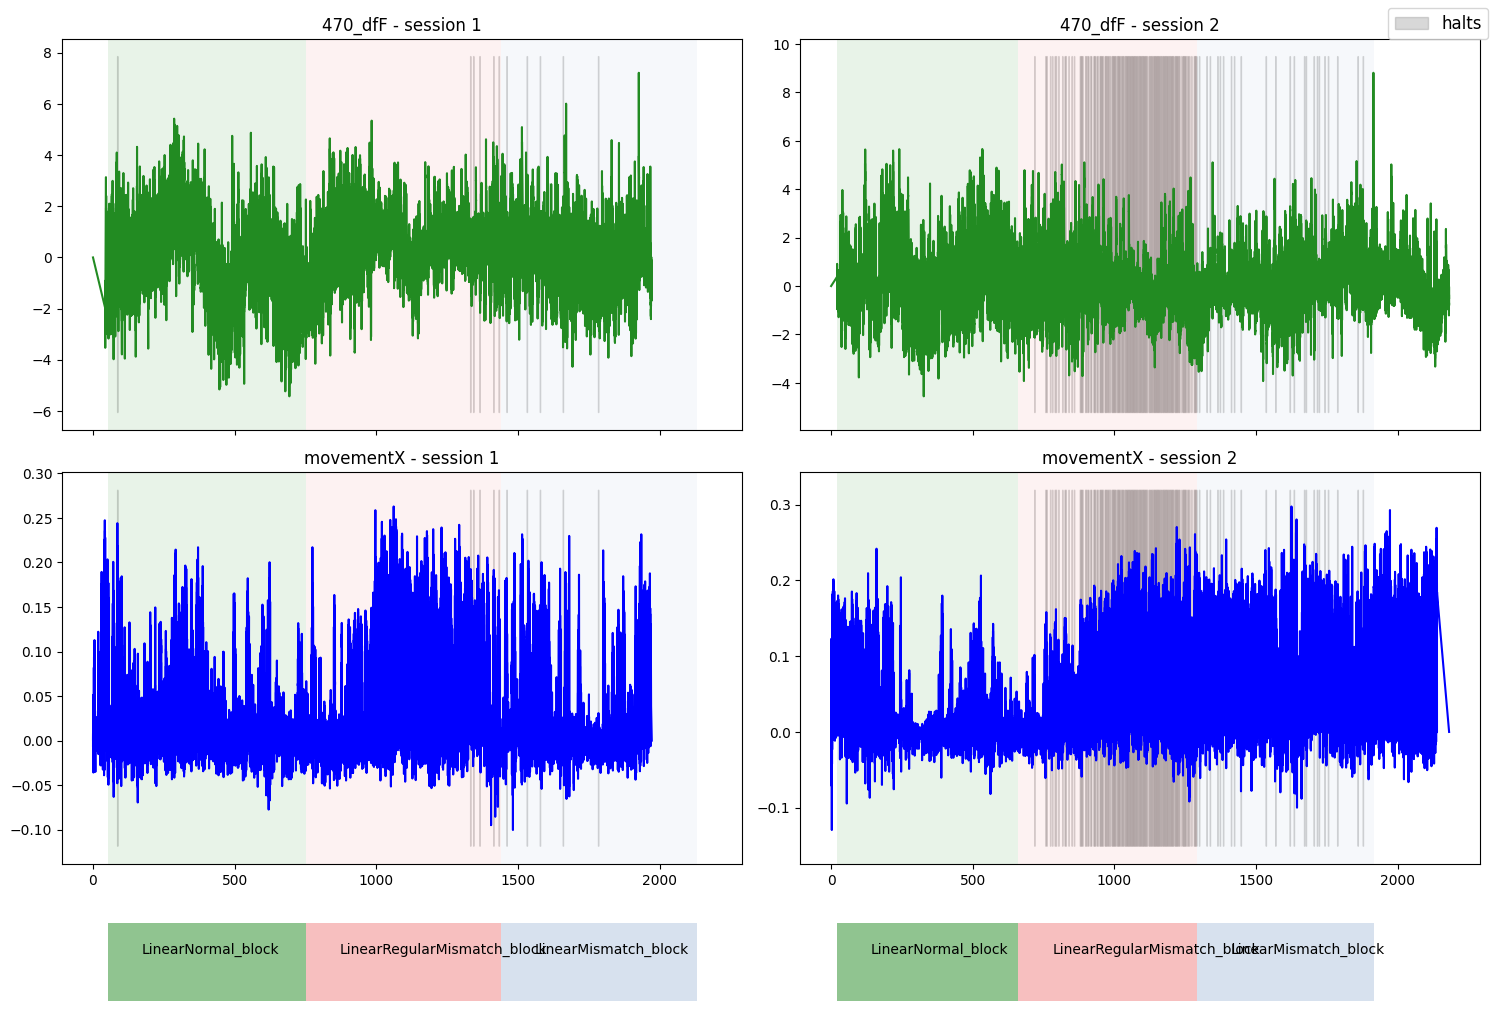

Plotted traces for B2M5


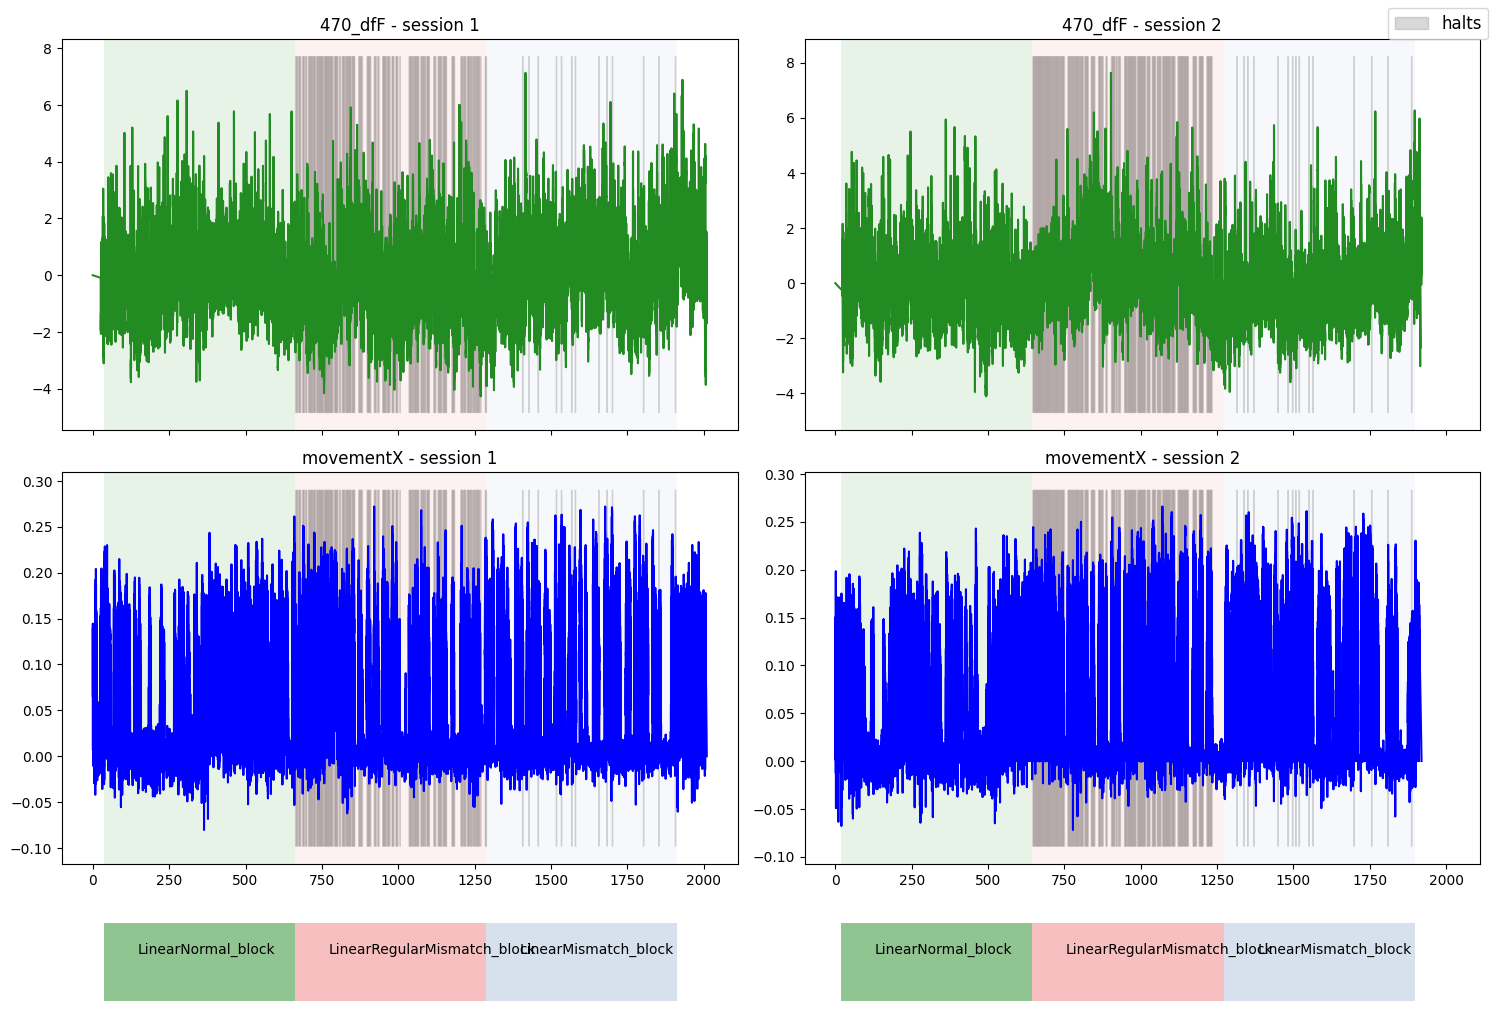

Plotted traces for B3M1


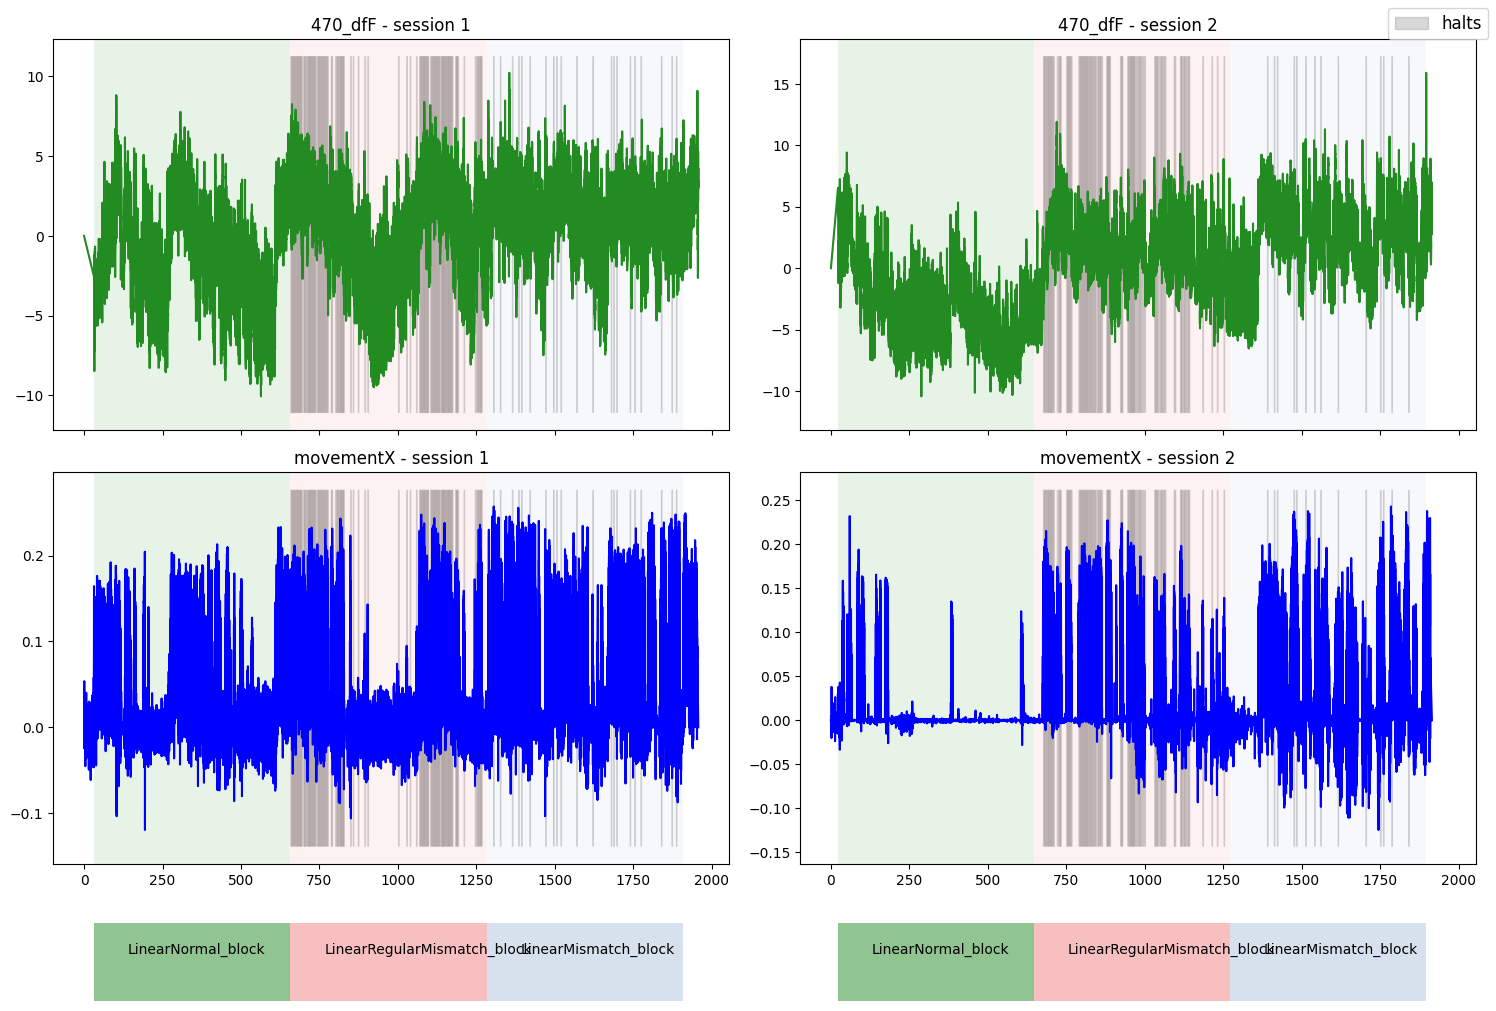

Plotted traces for B3M2


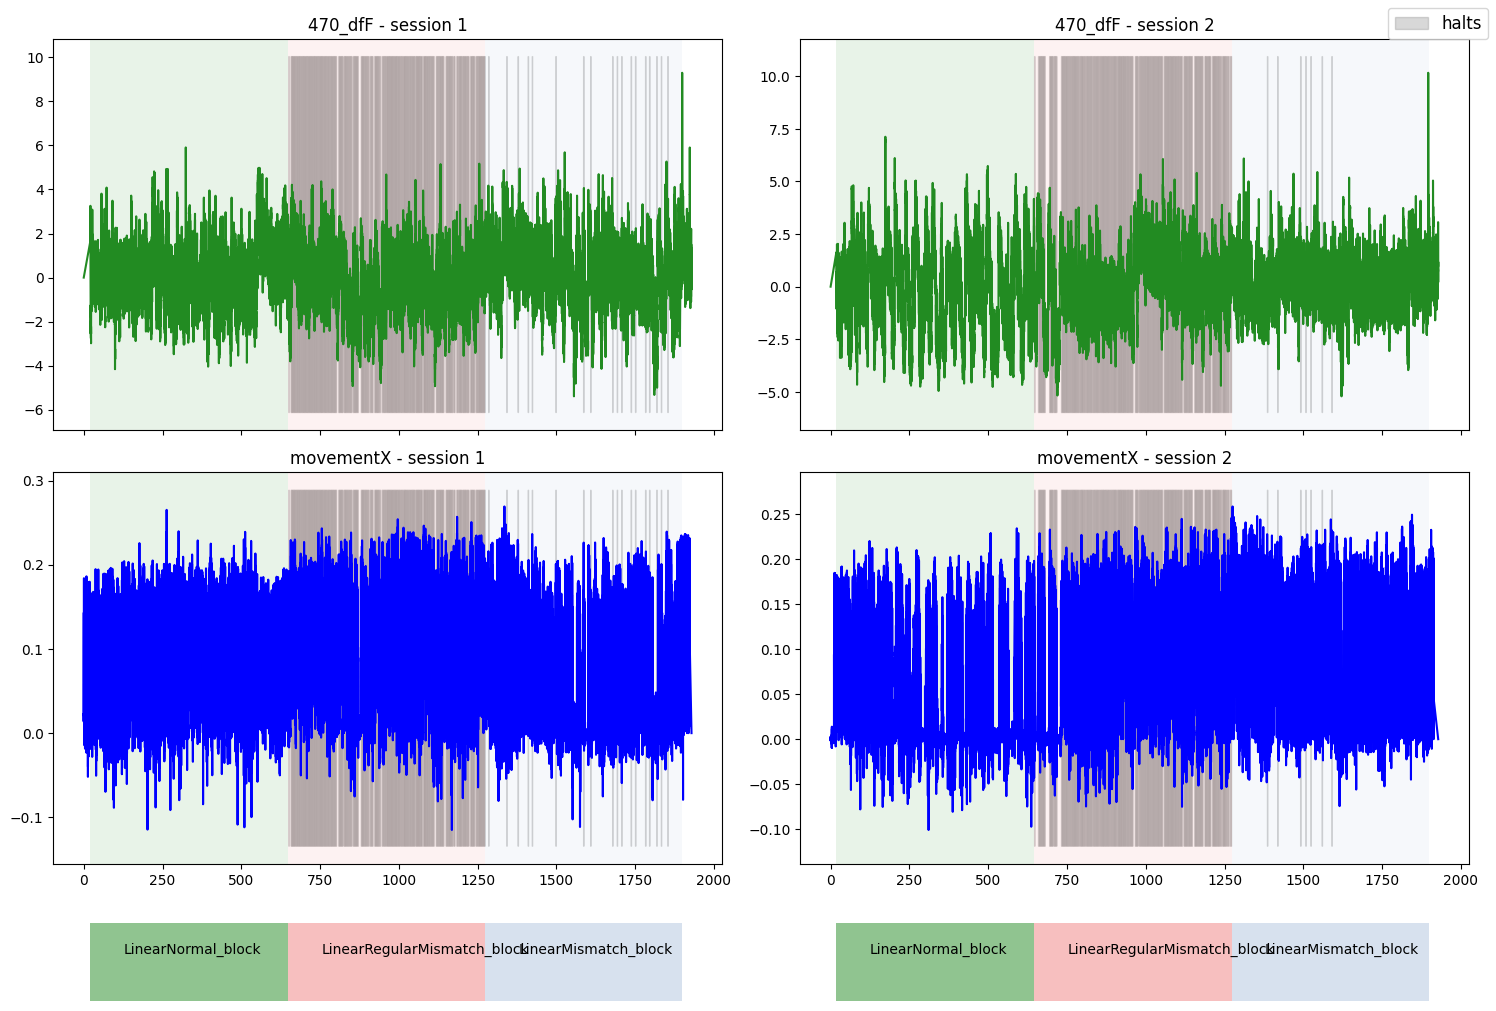

Plotted traces for B3M3
No data for B3M3 session session 2


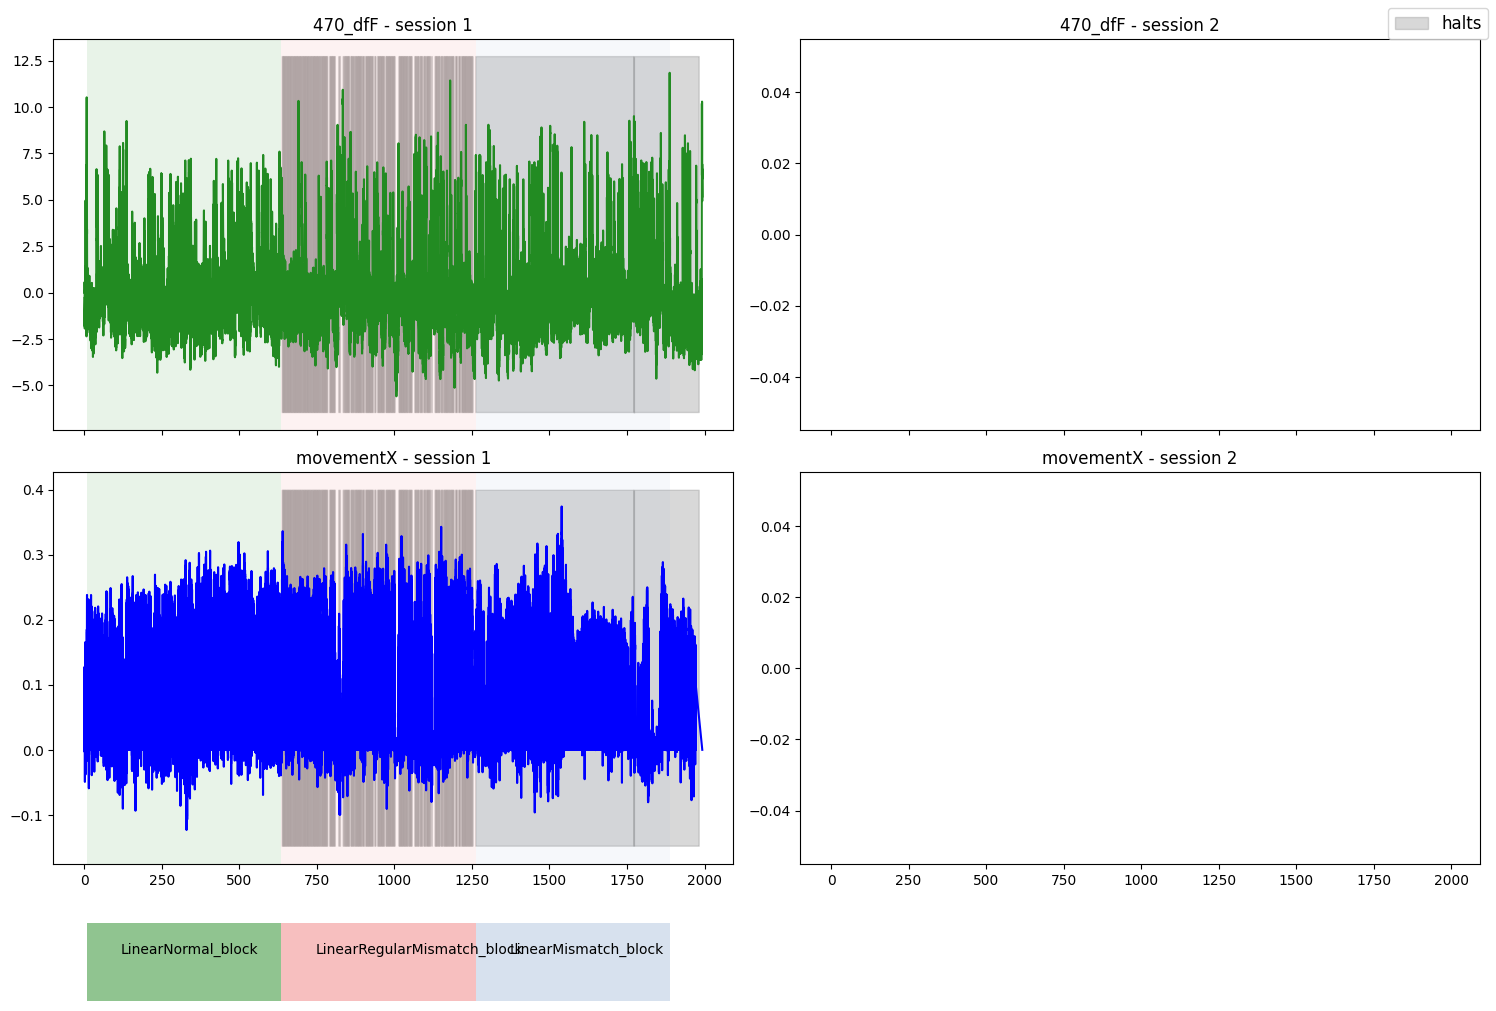

In [15]:
for mouse in GCaMP_Reg_1.mouseID.unique():
    mousedata = {'session 1':GCaMP_Reg_1.loc[GCaMP_Reg_1.mouseID == mouse], 'session 2':GCaMP_Reg_2.loc[GCaMP_Reg_2.mouseID == mouse]}
    fig, ax = view_session_mouse(mousedata, mouse)
    fig.savefig(f'Figures/GRAB{mouse}_view_alignment.png', format = 'png', dpi = 300)

## Filter with respect to blocks
Use the function: filter_data(data, filters = []). 
Ensure that therere is a filter in the filterdict within the function that corresponds to the blocks and other column specified values that you want to filter by.

You can add filters by adding lines to the dict of this format:
    'filter key name': ['Relevant column name', Relevant row values to filter],

Add the same filters to the dict you define below

* Allways filter by mouse in addition to other filters, if the input data includes multiple animal recordings

In [19]:
#Filter mice to get unique indexes

# first make the dict structure
mouse_data = {'session 1':{'closedloop': {},'regular': {}, 'no_mismatch':{}}, 'session 2': {'closedloop': {},'regular': {}, 'no_mismatch':{}}}

#Then assign mouse by mouse with filtered data to the dict
for mouse in GCaMP_Reg_1.mouseID.unique():
    mouse_data['session 1']['closedloop'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'closed_block'])
    mouse_data['session 1']['regular'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'regular_block'])
    mouse_data['session 1']['no_mismatch'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'normal_block'])
    
for mouse in GCaMP_Reg_2.mouseID.unique():
    mouse_data['session 2']['closedloop'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'closed_block'])
    mouse_data['session 2']['regular'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'regular_block'])
    mouse_data['session 2']['no_mismatch'][mouse] = filter_data(GCaMP_Reg_1, filters = [mouse, 'normal_block'])

# Testing new align function

In [137]:
import pandas as pd
import numpy as np

def align_to_event_start(df, trace_col, event_col, range_around_event, sampling_rate=0.001):
    """
    Align trace data around events and extract relevant metrics.
    
    Parameters:
    df (pd.DataFrame): Input data.
    trace_col (str): Column name for the trace to align.
    event_col (str): Column name marking events.
    range_around_event (list): Time range around the event [before, after].
    sampling_rate (float): Sampling rate in seconds (default 0.001).
    
    Returns:
    dict: Contains aligned trace chunks, baseline-corrected chunks, and movement metrics.
    """
    trace_chunk_list = []
    bsl_trace_chunk_list = []
    run_speed_list = []
    turn_speed_list = []
    event_index_list = []
    
    event_times = df.loc[df[event_col] & ~df[event_col].shift(1, fill_value=False)].index
    before_0, after_0 = range_around_event
    target_length = int(((before_0 + after_0) / sampling_rate) + 1)
    index_range = pd.Series(np.linspace(-before_0, after_0, target_length))
    
    for event_time in event_times:
        start, end = event_time - before_0, event_time + after_0
        chunk = df[trace_col].loc[start:end]
        run_speed = df['movementX'].loc[start:event_time].mean()
        turn_speed = df['movementY'].loc[start:event_time].mean()
        
        chunk.index = (chunk.index - chunk.index[0]) - before_0
        
        if len(chunk) < target_length:
            padding = pd.Series([np.nan] * (target_length - len(chunk)), index=pd.RangeIndex(len(chunk), target_length))
            chunk = pd.concat([chunk, padding])
            chunk.index = index_range
        
        baselined_chunk = baseline(chunk)  # Assuming baseline() is defined elsewhere
        trace_chunk_list.append(chunk.values)
        bsl_trace_chunk_list.append(baselined_chunk.values)
        run_speed_list.append(run_speed)
        turn_speed_list.append(turn_speed)
        event_index_list.append(event_time)
    
    if len(event_times) < 1:
        return {
            "trace_chunks": pd.DataFrame(),
            "bsl_trace_chunks": pd.DataFrame(),
            "movement_speeds": pd.DataFrame()
        }
    
    trace_chunks = pd.DataFrame(np.column_stack(trace_chunk_list), columns=event_index_list)
    bsl_trace_chunks = pd.DataFrame(np.column_stack(bsl_trace_chunk_list), columns=event_index_list)
    run_speeds = pd.Series(run_speed_list, index=event_index_list)
    turn_speeds = pd.Series(turn_speed_list, index=event_index_list)
    movement_speeds = pd.DataFrame({"Mean_moveX": run_speeds, "Mean_moveY": turn_speeds})
    
    trace_chunks.index = index_range
    bsl_trace_chunks.index = index_range
    
    return {
        "trace_chunks": trace_chunks,
        "bsl_trace_chunks": bsl_trace_chunks,
        "movement_speeds": movement_speeds
    }

def process_mouse_data(mouse_data, trace_col, event_col, range_around_event, sampling_rate=0.001):
    """
    Process mouse data dynamically across sessions, blocks, and mice.
    
    Parameters:
    mouse_data (dict): Nested dictionary of data.
    trace_col (str): Column name for the trace to align.
    event_col (str): Column name marking events.
    range_around_event (list): Time range around the event [before, after].
    sampling_rate (float): Sampling rate in seconds (default 0.001).
    
    Returns:
    dict: Processed data containing aligned and baseline-corrected traces.
    """
    aligned_data = {}
    
    for session, blocks in mouse_data.items():
        aligned_data[session] = {}
        for block, mice in blocks.items():
            aligned_data[session][block] = {}
            for mouse, df in mice.items():
                aligned_result = align_to_event_start(df, trace_col, event_col, range_around_event, sampling_rate)
                aligned_data[session][block][mouse] = aligned_result
    
    return aligned_data




In [330]:
def align_to_event_start(df, trace_cols_to_baseline, trace_cols_no_baseline, event_col, range_around_event, sampling_rate=0.001):
    """
    Align multiple trace columns around events and apply baseline correction to specified traces.
    
    Parameters:
    df (pd.DataFrame): Input data.
    trace_cols_to_baseline (list): List of column names for traces to baseline (e.g., ['470_dfF', 'movementX']).
    trace_cols_no_baseline (list): List of column names for traces not to baseline.
    event_col (str): Column name marking events.
    range_around_event (list): Time range around the event [before, after].
    sampling_rate (float): Sampling rate in seconds (default 0.001).
    
    Returns:
    dict: Contains aligned trace chunks for each trace column.
    """
    aligned_chunks = {col: [] for col in trace_cols_to_baseline + trace_cols_no_baseline}  # Initialize a dictionary to store aligned chunks for each column
    event_index_list = []
    
    # Identify event times (when the event starts)
    event_times = df.loc[df[event_col] & ~df[event_col].shift(1, fill_value=False)].index
    
    # Time range to align around
    before_0, after_0 = range_around_event
    target_length = int(((before_0 + after_0) / sampling_rate) + 1)
    index_range = pd.Series(np.linspace(-before_0, after_0, target_length))
    
    for event_time in event_times:
        start, end = event_time - before_0, event_time + after_0
        
        # For each trace column, extract and align the chunk
        for trace_col in trace_cols_to_baseline:
            chunk = df[trace_col].loc[start:end]
            
            # Padding if the chunk is smaller than the target length
            if len(chunk) < target_length:
                padding = pd.Series([np.nan] * (target_length - len(chunk)), index=pd.RangeIndex(len(chunk), target_length))
                chunk = pd.concat([chunk, padding])
            
            # Baseline correction: subtract the mean of the first second prior to the event
            baseline_window = int(before_0 / sampling_rate)
            baseline_value = chunk.iloc[:baseline_window].mean()  # Mean of the first second before the event
            chunk = chunk - baseline_value  # Baseline correction
            
            chunk.index = index_range  # Align the index to the specified time range
            
            aligned_chunks[trace_col].append(chunk.values)
        
        # For traces without baseline correction, just align them
        for trace_col in trace_cols_no_baseline:
            chunk = df[trace_col].loc[start:end]
            
            # Padding if the chunk is smaller than the target length
            if len(chunk) < target_length:
                padding = pd.Series([np.nan] * (target_length - len(chunk)), index=pd.RangeIndex(len(chunk), target_length))
                chunk = pd.concat([chunk, padding])
            
            chunk.index = index_range  # Align the index to the specified time range
            
            aligned_chunks[trace_col].append(chunk.values)
        
        # Keep track of the event indices (for later indexing in the result)
        event_index_list.append(event_time)
    
    # If no event times were found, return empty DataFrames for all trace columns
    if len(event_times) < 1:
        return {col: pd.DataFrame() for col in trace_cols_to_baseline + trace_cols_no_baseline}
    
    # Convert the list of aligned chunks into DataFrames for each trace column
    result = {col: pd.DataFrame(np.column_stack(aligned_chunks[col]), columns=event_index_list) for col in trace_cols_to_baseline + trace_cols_no_baseline}
    # Set the index to the time range
    for col in result:
        result[col].index = index_range
    
    return result



In [326]:
def process_mouse_data(mouse_data, trace_cols_to_baseline, trace_cols_no_baseline, event_col, range_around_event, sampling_rate=0.001):
    """
    Process mouse data dynamically across sessions, blocks, and mice, aligning multiple trace columns
    with baseline correction for specified columns.
    
    Parameters:
    mouse_data (dict): Nested dictionary of data.
    trace_cols_to_baseline (list): List of column names for traces to baseline (e.g., ['470_dfF', 'movementX']).
    trace_cols_no_baseline (list): List of column names for traces not to baseline.
    event_col (str): Column name marking events.
    range_around_event (list): Time range around the event [before, after].
    sampling_rate (float): Sampling rate in seconds (default 0.001).
    
    Returns:
    dict: Processed data containing aligned traces for each trace column.
    """
    aligned_data = {}
    
    # Iterate through the nested data structure (sessions, blocks, mice)
    for session, blocks in mouse_data.items():
        aligned_data[session] = {}
        for block, mice in blocks.items():
            aligned_data[session][block] = {}
            for mouse, df in mice.items():
                # Call align_to_event_start for each mouse's data, with baseline correction for specified traces
                aligned_result = align_to_event_start(df, trace_cols_to_baseline, trace_cols_no_baseline, event_col, range_around_event, sampling_rate)
                aligned_data[session][block][mouse] = aligned_result
    
    return aligned_data



In [346]:
# Example input data (assuming `aligned_data` is structured as needed)
trace_columns_to_baseline = ['470_dfF']  # Columns to baseline
trace_columns_no_baseline = ['movementY', 'movementX']  # Columns to leave unaltered
event_col = 'halt'

# Process the data
aligned_data = process_mouse_data(mouse_data, trace_columns_to_baseline, trace_columns_no_baseline, event_col, [1, 2])

event_col = 'No_halt'
aligned_data_nohalt = process_mouse_data(mouse_data, trace_columns_to_baseline, trace_columns_no_baseline, event_col, [1, 2])

In [347]:
aligned_data['session 1']['closedloop']['B2M4']

{'470_dfF':         1333.001  1343.768  1365.801  1414.684  1433.750  1461.267  1532.833  \
 -1.000 -0.563919 -0.755339 -0.213732  0.828059  0.721714  0.267325 -1.221253   
 -0.999 -0.550404 -0.737956 -0.211742  0.809299  0.728640  0.268300 -1.235396   
 -0.998 -0.536889 -0.720572 -0.209752  0.790539  0.735566  0.269276 -1.249539   
 -0.997 -0.523374 -0.703189 -0.207763  0.771779  0.742491  0.270252 -1.263681   
 -0.996 -0.509859 -0.685806 -0.205773  0.753019  0.749417  0.271227 -1.277824   
 ...          ...       ...       ...       ...       ...       ...       ...   
  1.996  0.548933 -0.097622 -1.483294 -0.212643 -1.472037  2.161558  0.374209   
  1.997  0.538747 -0.104683 -1.477023 -0.193906 -1.501489  2.145954  0.373731   
  1.998  0.528561 -0.111745 -1.470752 -0.175169 -1.530941  2.130350  0.372713   
  1.999  0.518375 -0.118806 -1.464481 -0.156432 -1.560393  2.114745  0.371694   
  2.000  0.508189 -0.125868 -1.458210 -0.137696 -1.589844  2.099141  0.370676   
 
         1579.0

In [328]:
#Get no-halt aligned traces
trace_columns = ['470_dfF', ]
event_col = 'No_halt'
range_around_event = [1, 2]  # 1 second before and 2 seconds after the event

#aligned_470dfF_nohalt = process_mouse_data(mouse_data, trace_col, event_col, range_around_event)

aligned_470dfF_nohalt = process_mouse_data(mouse_data, trace_columns, event_col, range_around_event=[-1, 2])

In [329]:
aligned_data

{'session 1': {'closedloop': {'B2M4': {'470_dfF':        1314.112  1325.138  1355.782  1378.512  1393.762  1487.566  1516.382  \
    1.000  1.049085  1.940588  0.622650  0.174451  0.303243 -1.222079 -0.466578   
    1.001  1.050063  1.926302  0.623341  0.171601  0.297990 -1.208508 -0.457039   
    1.002  1.051041  1.912016  0.624032  0.168751  0.292737 -1.194937 -0.447501   
    1.003  1.052018  1.897730  0.624722  0.165902  0.287485 -1.181366 -0.437962   
    1.004  1.052996  1.883444  0.625413  0.163052  0.282232 -1.167795 -0.428423   
    ...         ...       ...       ...       ...       ...       ...       ...   
    1.996  1.532390 -0.318554  0.742298 -0.508605  0.881094 -1.521450  0.920760   
    1.997  1.516924 -0.321036  0.736170 -0.519314  0.874924 -1.514941  0.911264   
    1.998  1.501459 -0.323518  0.730041 -0.530023  0.868753 -1.507646  0.901768   
    1.999  1.485994 -0.326001  0.723913 -0.540731  0.863362 -1.500351  0.892271   
    2.000  1.470529 -0.328483  0.717784 -

In [142]:
import pandas as pd
import numpy as np
from scipy.stats import sem  # for standard error calculation

def compute_trace_statistics(data_dict):
    result_rows = []
    
    for session, session_data in data_dict.items():
        for block_type, block_data in session_data.items():
            for mouse_id, mouse_data in block_data.items():
                trace_chunks = mouse_data['bsl_trace_chunks']  # Use baseline trace chunks
                
                ranges = [(0, 1), (1, 2)]
                for time_range in ranges:
                    start, end = time_range
                    time_filtered = trace_chunks[(trace_chunks.index >= start) & (trace_chunks.index < end)]
                    
                    if time_filtered.empty:
                        # Handle empty data case
                        result_rows.append({
                            'session': session,
                            'block_type': block_type,
                            'mouse_id': mouse_id,
                            'time_range': f"{start}-{end}s",
                            'valid_data': False,
                            'peak': np.nan,
                            'mean': np.nan,
                            'median': np.nan,
                            'stderr': np.nan
                        })
                        continue
                
                    # Compute statistics
                    peak = time_filtered.max().mean()
                    peak_stdev = time_filtered.max().std()
                    mean = time_filtered.mean().mean()
                    mean_stdev = time_filtered.mean().std()
                    median = time_filtered.median().median()
                    stderr = sem(time_filtered.to_numpy().flatten(), nan_policy='omit')
                    
                    result_rows.append({
                        'session': session,
                        'block_type': block_type,
                        'mouse_id': mouse_id,
                        'time_range': f"{start}-{end}s",
                        'valid_data': True,
                        'peak': peak,
                        'peak_std': peak_stdev,
                        'mean': mean,
                        'mean_std': mean_stdev,
                        'median': median,
                        'stderr': stderr
                    })
    
    return pd.DataFrame(result_rows)




In [143]:
result_df = compute_trace_statistics(aligned_470dfF_data)



In [144]:
result_df.loc[result_df.mouse_id == 'B2M4']

,session,block_type,mouse_id,time_range,valid_data,peak,peak_std,mean,mean_std,median,stderr
0,session 1,closedloop,B2M4,0-1s,True,0.794532,1.123233,-0.159289,0.789283,-0.225178,0.008706
1,session 1,closedloop,B2M4,1-2s,True,0.987141,1.335362,0.039486,0.961281,-0.047689,0.010558
10,session 1,regular,B2M4,0-1s,False,NaN,NaN,NaN,NaN,NaN,NaN
11,session 1,regular,B2M4,1-2s,False,NaN,NaN,NaN,NaN,NaN,NaN
20,session 1,no_mismatch,B2M4,0-1s,True,1.250278,NaN,0.611734,NaN,0.740665,0.013752
21,session 1,no_mismatch,B2M4,1-2s,True,0.883218,NaN,0.023865,NaN,0.044157,0.015374
30,session 2,closedloop,B2M4,0-1s,True,0.794532,1.123233,-0.159289,0.789283,-0.225178,0.008706
31,session 2,closedloop,B2M4,1-2s,True,0.987141,1.335362,0.039486,0.961281,-0.047689,0.010558
38,session 2,regular,B2M4,0-1s,False,NaN,NaN,NaN,NaN,NaN,NaN
39,session 2,regular,B2M4,1-2s,False,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
#result_df

mouse_aligned_nohalt = {'session 1':{'closedloop': {},'regular': {}, 'no_mismatch':{}}, 'session 2': {'closedloop': {},'regular': {}, 'no_mismatch':{}}}
move_speeds_nohalt = {'session 1':{'closedloop': {},'regular': {}, 'no_mismatch':{}}, 'session 2': {'closedloop': {},'regular': {}, 'no_mismatch':{}}}
for session, session_dict in mouse_data.items():
    for block, mice in session_dict.items():
        for mouse, df in mice.items():
            event_alinged, bsl_event_alinged, run_speeds = align_to_event_start(df, '470_dfF', 'No_halt',[1,2])
            mouse_aligned_nohalt[session][block][mouse] = bsl_event_alinged  #bsl indicates that it is baselined to the last 1 second before halt
            move_speeds_nohalt[session][block][mouse]  = run_speeds

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mouse_blocks(data, time_vector, halt_duration=1.0):
    """
    Plot traces of aligned data for multiple mice and blocks.
    
    Parameters:
    - data: Dictionary of {mouse_id: {block_id: traces (2D numpy array of traces)}}
    - time_vector: 1D numpy array of time values corresponding to the columns in `traces`.
    - halt_duration: Duration of the halt in seconds (default is 1.0).
    """
    if not data:
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, 'No data', fontsize=18, ha='center', va='center', transform=plt.gca().transAxes)
        plt.axis('off')
        plt.show()
        return
    
    plt.figure(figsize=(12, 8))
    
    for mouse, blocks in data.items():
        for block, traces in blocks.items():
            if traces.size == 0:
                continue
            
            # Plot individual traces in grey
            for trace in traces:
                plt.plot(time_vector, trace, color='grey', alpha=0.5, linewidth=0.5)
            
            # Compute mean and standard deviation for the block
            mean_trace = np.mean(traces, axis=0)
            std_trace = np.std(traces, axis=0)
            
            # Plot mean trace in blue with standard deviation
            plt.plot(time_vector, mean_trace, color='blue', label=f'Mouse {mouse}, Block {block}')
            plt.fill_between(time_vector, mean_trace - std_trace, mean_trace + std_trace, color='blue', alpha=0.2)
    
    # Add a vertical line at t = 0
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, label='Halt start')
    
    # Add a shaded region for the halt duration
    plt.axvspan(0, halt_duration, color='grey', alpha=0.3, label='Halt duration')
    
    # Add labels, legend, and grid
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Signal', fontsize=14)
    plt.title('Aligned Traces by Mouse and Block', fontsize=16)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [181]:
def plot_compare_blocks(block_dict, event):
    """
    Plot comparison across blocks for event-aligned data using baselined trace chunks.
    
    Parameters:
    - block_dict (dict): Nested dictionary with event-aligned data.
    - event (str): The event to align the traces, e.g., "bsl_trace_chunks".
    """
    # Determine number of blocks (columns) and maximum number of mice (rows)
    num_blocks = len(block_dict)
    max_mice = max(len(mice_data) for mice_data in block_dict.values())
    
    # Set up the figure with the determined number of rows and columns
    fig, ax = plt.subplots(max_mice, num_blocks, figsize=(5 * num_blocks, 3 * max_mice), squeeze=False)
    fig.suptitle("Comparison Across Blocks (Baselined Traces)", fontsize=16)
    
    # Iterate over blocks and mice to plot
    for col_idx, (block, mice_data) in enumerate(block_dict.items()):
        for row_idx, (mouse_id, mouse_data) in enumerate(mice_data.items()):
            # Extract the baselined trace chunks for the specified event
            if event in mouse_data:
                trace_data = mouse_data[event]
                # Plot each trace
                for column in trace_data.columns:
                    ax[row_idx, col_idx].plot(trace_data.index, trace_data[column], c = 'grey', alpha = 0.2)
                    
                ax[row_idx, col_idx].plot(trace_data.index, trace_data.mean(axis=1), label=f'mean', c = 'blue', alpha = 0.5)
                ax[row_idx, col_idx].fill_between(
                trace_data.index,
                trace_data.mean(axis=1) + trace_data.std(axis=1),
                trace_data.mean(axis=1) - trace_data.std(axis=1),
                color='blue',
                alpha=0.3,
            )
            # Customize plot
            ax[row_idx, col_idx].set_title(f"Block: {block}, Mouse: {mouse_id}")
            ax[row_idx, col_idx].set_xlabel("Time (s)")
            ax[row_idx, col_idx].set_ylabel("Signal")
            #ax[row_idx, col_idx].legend(loc="upper right", fontsize=8)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
    plt.show()


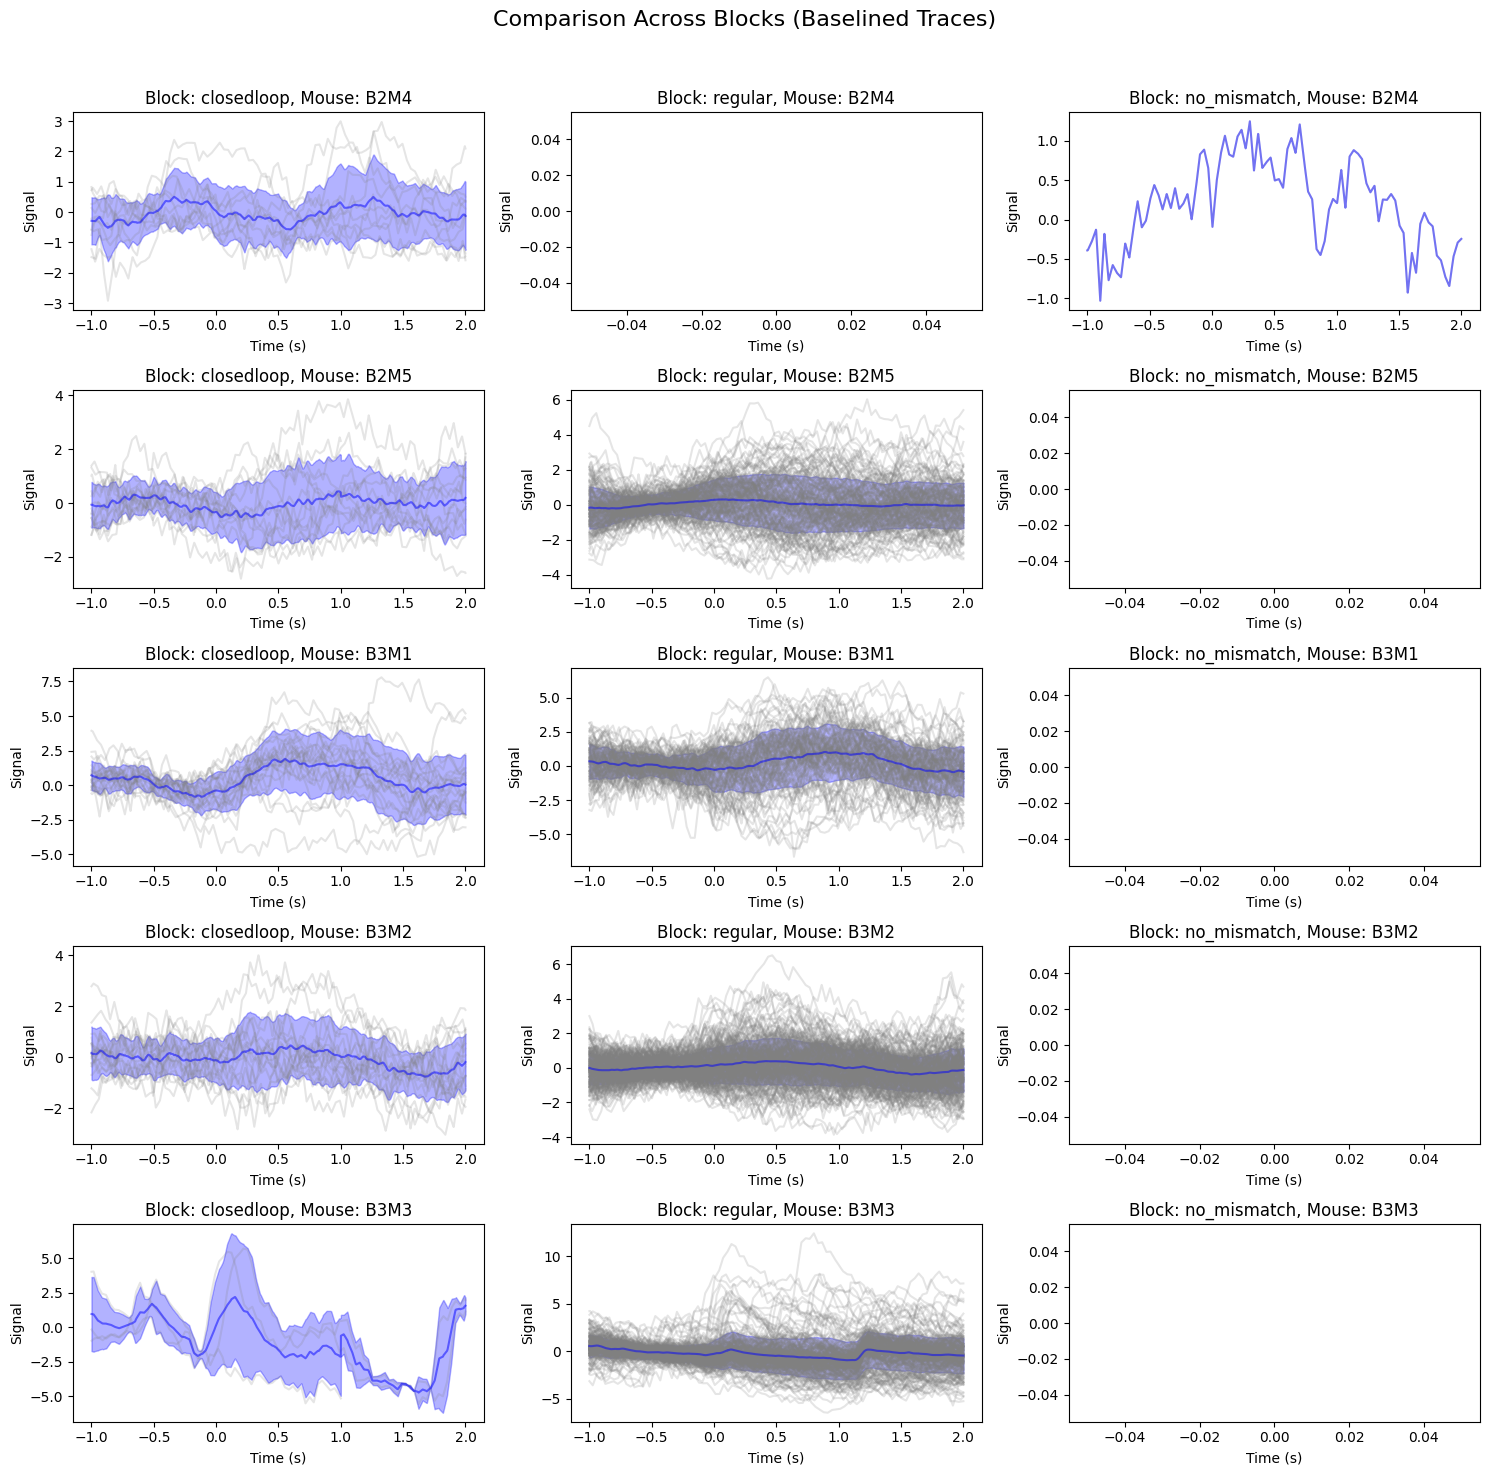

In [182]:
# Assume `aligned_data` is your dictionary structure
plot_compare_blocks(aligned_470dfF_data['session 1'], 'bsl_trace_chunks')


print('\033[1m Session 1 \033[0m')
mean_mouse_dict_s1 =plot_compare_blocks(mouse_aligned['session 1'], 'halt')


print('\033[1m Session 2 \033[0m')
mean_mouse_dict_s2 =plot_compare_blocks(mouse_aligned['session 2'], 'halt')

print('\033[1m Session 1 no-halt alignment \033[0m')
mean_mouse_dict_s1_nohalt =plot_compare_blocks(mouse_aligned_nohalt['session 1'], 'No halt')

mouse_aligned['session 1']['closedloop']
mouse_aligned['session 1']['regular']['B2M4']

In [288]:
def preprocess_bsl_data(aligned_data):
    """
    Extract mean traces from the 'bsl_trace_chunks' key for each mouse and restructure the dictionary.

    Parameters:
    - aligned_data (dict): Original dictionary with structure:
                           {session: block: mouse: 'trace_chunks': data, 'bsl_trace_chunks': data, ...}

    Returns:
    - processed_data (dict): Simplified dictionary with structure:
                             {session: block: mouse: mean_bsl_trace}
    """
    processed_data = {}

    for session, blocks in aligned_data.items():
        processed_data[session] = {}
        for block, mice in blocks.items():
            processed_data[session][block] = pd.DataFrame()
            for mouse, data in mice.items():
                if 'bsl_trace_chunks' in data:
                    # Compute mean trace for 'bsl_trace_chunks'
                    bsl_data = data['bsl_trace_chunks']  # Assumes a 2D array (trials x time)
                    mean_bsl_trace = bsl_data.mean(axis=1) if bsl_data.size else np.nan
                    
                    processed_data[session][block][mouse] = mean_bsl_trace
    return processed_data

'''
def preprocess_bsl_data(aligned_data):
    """
    Extract mean traces from the 'bsl_trace_chunks' key for each mouse and restructure the dictionary.

    Parameters:
    - aligned_data (dict): Original dictionary with structure:
                           {session: block: mouse: 'trace_chunks': data, 'bsl_trace_chunks': data, ...}

    Returns:
    - processed_data (dict): Simplified dictionary with structure:
                             {session: block: mouse: mean_bsl_trace}
    """
    processed_data = {}

    for session, blocks in aligned_data.items():
        processed_data[session] = {}
        for block, mice in blocks.items():
            processed_data[session][block] = pd.DataFrame()
            for mouse, data in mice.items():
                if 'bsl_trace_chunks' in data:
                    # Compute mean trace for 'bsl_trace_chunks'
                    bsl_data = data['bsl_trace_chunks']  # Assumes a 2D array (trials x time)
                    if bsl_data.size:
                        mean_bsl_trace = bsl_data.mean(axis=1)
                    else:
                        # Create NaN array matching the length of expected output
                        mean_bsl_trace = np.full(bsl_data.shape[0], np.nan)
                    
                    processed_data[session][block][mouse] = mean_bsl_trace
    return processed_data'''


'\ndef preprocess_bsl_data(aligned_data):\n    """\n    Extract mean traces from the \'bsl_trace_chunks\' key for each mouse and restructure the dictionary.\n\n    Parameters:\n    - aligned_data (dict): Original dictionary with structure:\n                           {session: block: mouse: \'trace_chunks\': data, \'bsl_trace_chunks\': data, ...}\n\n    Returns:\n    - processed_data (dict): Simplified dictionary with structure:\n                             {session: block: mouse: mean_bsl_trace}\n    """\n    processed_data = {}\n\n    for session, blocks in aligned_data.items():\n        processed_data[session] = {}\n        for block, mice in blocks.items():\n            processed_data[session][block] = pd.DataFrame()\n            for mouse, data in mice.items():\n                if \'bsl_trace_chunks\' in data:\n                    # Compute mean trace for \'bsl_trace_chunks\'\n                    bsl_data = data[\'bsl_trace_chunks\']  # Assumes a 2D array (trials x time)\n       

In [289]:
def plot_mean_across_blocks(session_blocks, control_blocks, title="Mean Across Blocks"):
    """
    Plot a single figure with the mean across mouse means for each block.
    
    Parameters:
    - session_blocks (dict): Dictionary of session data, where keys are block names
                             and values are DataFrames of aligned data.
    - control_blocks (dict): Dictionary of control data with the same structure.
    - title (str): Title of the plot.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.spines[['right', 'top']].set_visible(False)

    for block_name, mouse_data in session_blocks.items():
        if mouse_data.empty:
            print(f"No data for block: {block_name}")
            continue

        # Compute mean and std across mice
        mean_across_mice = mouse_data.mean(axis=1)
        std_across_mice = mouse_data.std(axis=1)

        # Plot block trace
        ax.plot(mean_across_mice, label=f'{block_name} Mean')
        ax.fill_between(
            mean_across_mice.index,
            mean_across_mice - std_across_mice,
            mean_across_mice + std_across_mice,
            alpha=0.2,
        )

    for block_name, mouse_data in control_blocks.items():
        if mouse_data.empty:
            print(f"No data for control block: {block_name}")
            continue

        # Compute mean and std across mice
        mean_across_mice = mouse_data.mean(axis=1)
        std_across_mice = mouse_data.std(axis=1)

        # Plot control block
        ax.plot(mean_across_mice, label=f'{block_name} Control Mean', color='black', linestyle='--')
        ax.fill_between(
            mean_across_mice.index,
            mean_across_mice - std_across_mice,
            mean_across_mice + std_across_mice,
            color='grey',
            alpha=0.3,
        )

    ax.axvline(0, color='grey', linestyle='--')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()  # Explicitly show the figure



In [290]:
processed_session_data = preprocess_bsl_data(aligned_470dfF_data)
processed_control_data = preprocess_bsl_data(aligned_470dfF_nohalt)


In [293]:
session1_blocks = {'closedloop': processed_session_data['session 1']['closedloop'],
                  'regular': processed_session_data['session 1']['regular']}
control1_blocks = {'closedloop': processed_control_data['session 1']['closedloop']}

session2_blocks = {'closedloop': processed_session_data['session 2']['closedloop'],
                  'regular': processed_session_data['session 2']['regular']}
control2_blocks = {'closedloop': processed_control_data['session 2']['closedloop']}


In [294]:
control1_blocks['closedloop']

,B2M4,B2M5,B3M1,B3M2,B3M3
-1.000,0.102008,0.225065,-0.251648,-0.142954,NaN
-0.999,0.097190,0.224338,-0.246572,-0.142780,NaN
-0.998,0.092207,0.223600,-0.242064,-0.142605,NaN
-0.997,0.087157,0.222616,-0.237173,-0.142431,NaN
-0.996,0.082107,0.221467,-0.232201,-0.142256,NaN
...,...,...,...,...,...
1.996,0.297144,-0.485574,-0.195038,-0.379221,NaN
1.997,0.293605,-0.481951,-0.195594,-0.372566,NaN
1.998,0.290125,-0.478454,-0.197278,-0.366858,NaN
1.999,0.286880,-0.475823,-0.199338,-0.362628,NaN


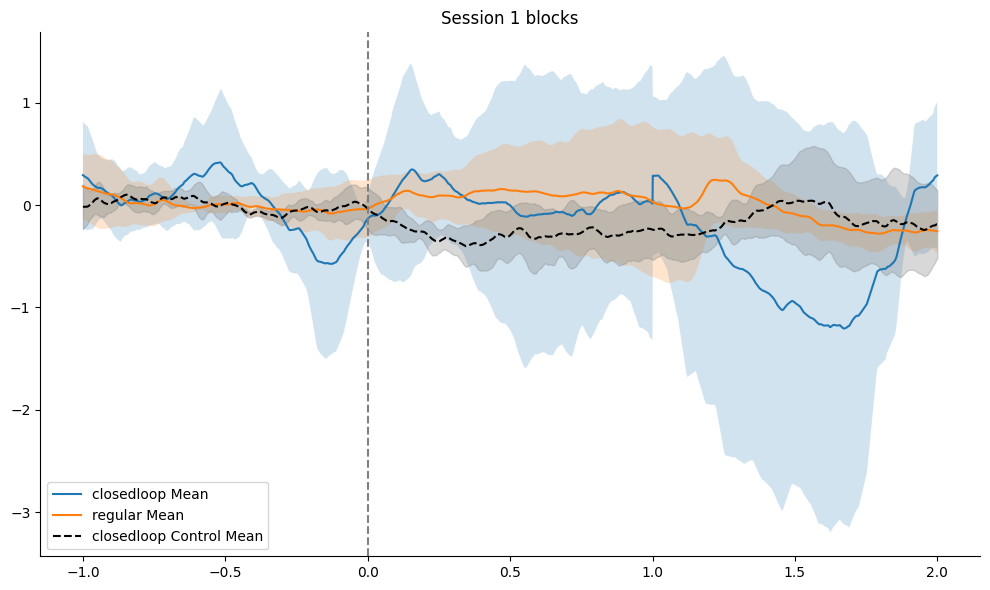

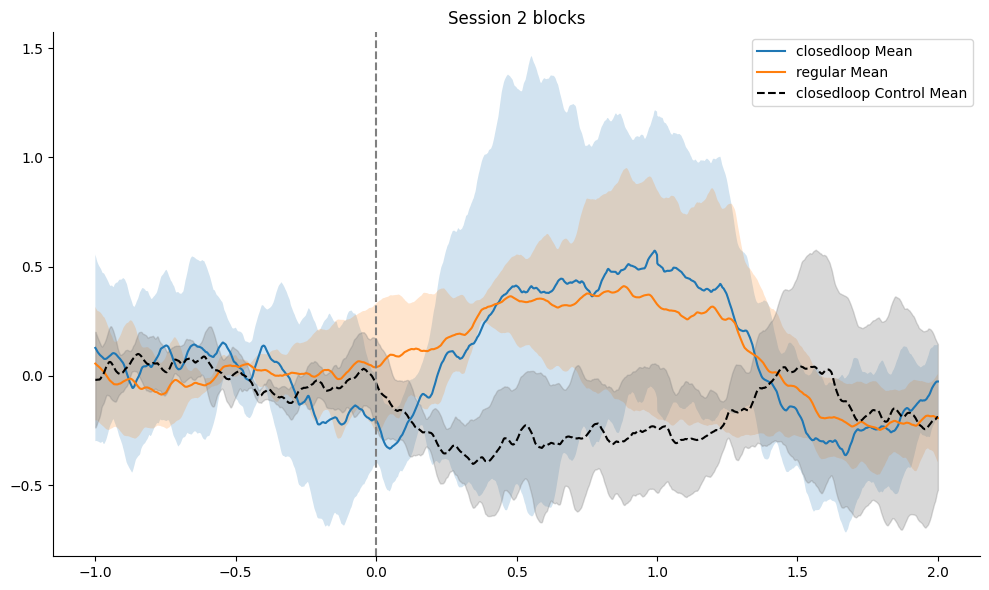

In [296]:

# Plot the data
plot_mean_across_blocks(session1_blocks, control1_blocks, title="Session 1 blocks")
plot_mean_across_blocks(session2_blocks, control1_blocks, title="Session 2 blocks")


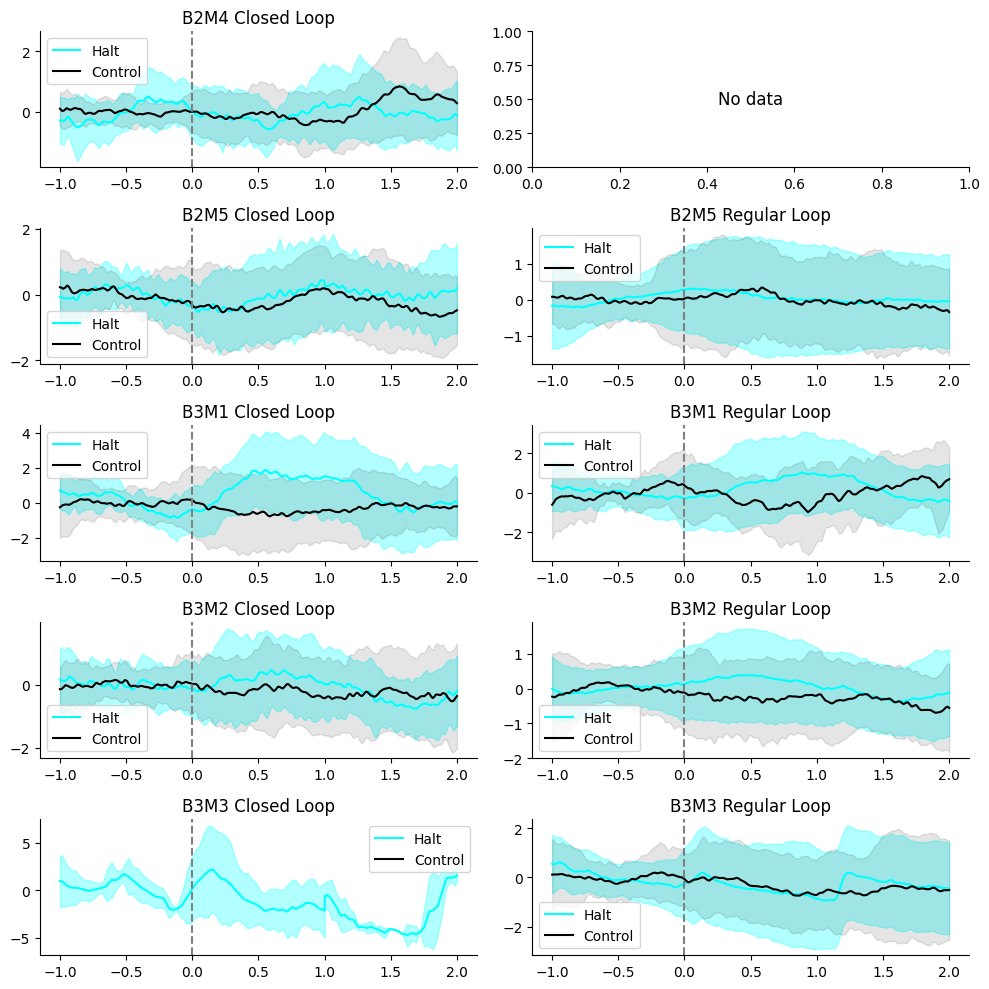

In [297]:
fig, axes = plt.subplots(len(aligned_470dfF_data['session 1']['closedloop']), 2, figsize=(10, 10))
axes = axes.flatten()

i = 0
for (mouse, aligned_data_closed), (mouse_regular, aligned_data_regular) in zip(
    mouse_aligned['session 1']['closedloop'].items(),
    mouse_aligned['session 1']['regular'].items(),
):
    # Closed-loop plot
    ax = axes[i]
    ax.spines[['right', 'top']].set_visible(False)
    
    if not aligned_data_closed.empty:  # Check if closed-loop data is available
        try:
            aligned_nohalt = mouse_aligned_nohalt['session 1']['closedloop'][mouse]

            # Compute mean and standard deviation
            mouse_data_mean = aligned_data_closed.mean(axis=1)
            mouse_data_std = aligned_data_closed.std(axis=1)
            mouse_nohalt_mean = aligned_nohalt.mean(axis=1)
            mouse_nohalt_std = aligned_nohalt.std(axis=1)

            # Plot main trace
            ax.plot(mouse_data_mean, label='Halt', color='cyan')
            ax.fill_between(
                mouse_data_mean.index,
                mouse_data_mean + mouse_data_std,
                mouse_data_mean - mouse_data_std,
                color='cyan',
                alpha=0.3,
            )

            # Plot control trace
            ax.plot(mouse_nohalt_mean, color='black', label='Control')
            ax.fill_between(
                mouse_nohalt_mean.index,
                mouse_nohalt_mean + mouse_nohalt_std,
                mouse_nohalt_mean - mouse_nohalt_std,
                color='black',
                alpha=0.1,
            )

            ax.axvline(0, color='grey', linestyle='--')
            ax.set_title(f'{mouse} Closed Loop')
            ax.legend()
        except KeyError:
            ax.text(0.5, 0.5, 'No data', fontsize=12, ha='center', va='center')
    else:
        ax.text(0.5, 0.5, 'No data', fontsize=12, ha='center', va='center')
    
    i += 1

    # Regular mismatch plot
    ax = axes[i]
    ax.spines[['right', 'top']].set_visible(False)
    
    if not aligned_data_regular.empty:  # Check if regular mismatch data is available
        try:
            aligned_nohalt_reg = mouse_aligned_nohalt['session 1']['no_mismatch'][mouse]

            # Compute mean and standard deviation
            mouse_data_mean = aligned_data_regular.mean(axis=1)
            mouse_data_std = aligned_data_regular.std(axis=1)
            mouse_nohalt_reg_mean = aligned_nohalt_reg.mean(axis=1)
            mouse_nohalt_reg_std = aligned_nohalt_reg.std(axis=1)

            # Plot main trace
            ax.plot(mouse_data_mean, label='Halt', color='cyan')
            ax.fill_between(
                mouse_data_mean.index,
                mouse_data_mean + mouse_data_std,
                mouse_data_mean - mouse_data_std,
                color='cyan',
                alpha=0.3,
            )

            # Plot control trace
            ax.plot(mouse_nohalt_reg_mean, color='black', label='Control')
            ax.fill_between(
                mouse_nohalt_reg_mean.index,
                mouse_nohalt_reg_mean + mouse_nohalt_reg_std,
                mouse_nohalt_reg_mean - mouse_nohalt_reg_std,
                color='black',
                alpha=0.1,
            )

            ax.axvline(0, color='grey', linestyle='--')
            ax.set_title(f'{mouse} Regular Loop')
            ax.legend()
        except KeyError:
            ax.text(0.5, 0.5, 'No data', fontsize=12, ha='center', va='center')
    else:
        ax.text(0.5, 0.5, 'No data', fontsize=12, ha='center', va='center')
    
    i += 1

fig.tight_layout(pad=1.08)



In [298]:
def extract_aligned_vars(aligned_data_dict, aligned_movement_dict):
    # Initialize an empty list to store results
    results = []
    
    for session_number, session_blocks in aligned_data_dict.items():
        for session_block, mice_data in session_blocks.items():
            for mouse_id, item in mice_data.items():
                run_df = aligned_movement_dict[session_number][session_block][mouse_id]
                # Check if the item is a DataFrame
                if not isinstance(item, pd.DataFrame):
                    print(f"Warning: The data for Mouse ID '{mouse_id}' in session '{session_number}' and block '{session_block}' is not a DataFrame. Skipping.")
                    continue

                # Copy the DataFrame and ensure the index is numeric
                df = item.copy()
                df.index = pd.to_numeric(df.index)

                # Process each column independently
                for column in df.columns:
                    event_time_data = df.loc[0:1, column]  # Data during the event (0 to +1 seconds)
                    post_event_data = df.loc[1:2, column]  # Data during the first second after the event (+1 to +2 seconds)

                    peak_response = event_time_data.max()  # Max response during the event
                    min_response = event_time_data.min()  # Minimum response during the event
                    mean_response_event = event_time_data.mean()  # Mean response during the event
                    mean_response_post_event = post_event_data.mean()  # Mean response during the post-event time
                    min_response_post_event = post_event_data.min()  #Minimum response during the post-event time
                    peak_response_post_event = post_event_data.max() #Maximum response during the post-event time

                    #Given Mean_moveX and Y being the row names in the movement df, the 1 second pre halt movement speeds are added
                    x_move = run_df.loc['Mean_moveX', column]
                    y_move = run_df.loc['Mean_moveY', column]
    
                    #add results to list of dicts
                    results.append({
                        "SessionNumber": session_number,
                        "SessionBlock": session_block,
                        "MouseID": mouse_id,
                        "EventTime": column,
                        "moveX": x_move,
                        "moveY": y_move,
                        "PeakResponse": peak_response,
                        "MinResponse":  min_response,
                        "MeanResponse": mean_response_event,
                        "MeanResponse_after": mean_response_post_event,
                        "MinResponse_after": min_response_post_event,
                        "PeakResponse_after": peak_response_post_event,
                    })

    # convert to a pandas df
    output_df = pd.DataFrame(results)
    return output_df



In [301]:
extracted_variables = extract_aligned_vars(aligned_470dfF_data, move_speeds)


In [300]:
extracted_variables 

,SessionNumber,SessionBlock,MouseID,EventTime,moveX,moveY,PeakResponse,MinResponse,MeanResponse,MeanResponse_after,MinResponse_after,PeakResponse_after
0,session 1,closedloop,B2M4,1333.001,0.081412,0.008703,1.195356,-0.256045,0.396702,0.838395,0.324907,1.350261
1,session 1,closedloop,B2M4,1343.768,0.096112,0.012077,-0.028073,-1.280589,-0.697178,-0.064497,-0.623926,0.584640
2,session 1,closedloop,B2M4,1365.801,0.061120,0.010081,-0.530046,-2.321845,-1.180927,-0.661983,-1.857020,0.147783
3,session 1,closedloop,B2M4,1414.684,0.109788,0.008807,0.702351,-0.538133,0.157456,-0.734807,-1.466414,0.166567
4,session 1,closedloop,B2M4,1433.750,0.059148,0.002783,0.101872,-1.360960,-0.536636,-1.287751,-1.612481,-0.643230
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,session 2,regular,B3M2,1265.472,0.142224,0.006871,0.242408,-0.952862,-0.375718,0.175138,-1.447836,1.201134
1325,session 2,regular,B3M2,1267.955,0.144005,0.010890,0.659845,-1.116955,-0.279598,-0.751723,-1.522923,-0.164377
1326,session 2,regular,B3M2,1270.455,0.130761,0.012767,1.858580,-0.349883,0.441304,0.138250,-2.037850,1.850797
1327,session 2,regular,B3M2,1272.955,0.132684,0.007849,2.736490,0.957738,1.803583,0.705988,0.147425,1.654395


In [138]:
extracted_variables_nohalt = extract_aligned_vars(mouse_aligned_nohalt, move_speeds_nohalt)


In [139]:
extracted_variables_nohalt['event']='no halt'
extracted_variables['event']='halt'
combined_vars = pd.concat([extracted_variables_nohalt, extracted_variables])

combined_vars.to_csv('GRAB_MM_extracted_vars.csv', index=False)

In [140]:
##Consider adding to the fitted model a continous variable which is the time column
#EventTime should currently be seconds from session start

# Look for correlation between running and fluorescence changes

In [141]:
GCaMP_Reg_1

,470_dfF,movementX,movementY,halt,ExperimentEvents,Experiment,Session,mouseID,sex,area,No_halt,LinearMismatch_block,LinearRegularMismatch_block,LinearNormal_block
Seconds,,,,,,,,,,,,,,
0.000,-0.000021,1.411287e-03,0.000578,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.001,-0.000067,4.547482e-03,0.001861,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.002,-0.000113,6.272389e-03,0.002336,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.003,-0.000159,6.272389e-03,0.001823,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
0.004,-0.000205,6.272389e-03,0.001309,False,NaN,MMclosed-and-Regular,day1,B2M4,M,V2M,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992.723,5.189932,1.729690e-05,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False
1992.724,5.186361,1.255802e-05,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False
1992.725,5.182791,7.819145e-06,0.000000,False,NaN,MMclosed-and-Regular,day1,B3M3,F,V1,False,False,False,False


In [160]:
subset = filter_data(GCaMP_Reg_1, ['B2M5', 'day1'])

In [161]:
subset

,470_dfF,movementX,movementY,halt,ExperimentEvents,Experiment,Session,mouseID,sex,area,No_halt,LinearMismatch_block,LinearRegularMismatch_block,LinearNormal_block
Seconds,,,,,,,,,,,,,,
0.000,-0.000002,0.007717,0.000996,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
0.001,-0.000005,0.024866,0.003209,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
0.002,-0.000009,0.042014,0.005422,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
0.003,-0.000012,0.059163,0.007635,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
0.004,-0.000016,0.076311,0.009848,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010.197,-0.566807,0.000124,0.000025,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
2010.198,-0.565726,0.000093,0.000019,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False
2010.199,-0.564645,0.000061,0.000012,False,NaN,MMclosed-and-Regular,day1,B2M5,M,V2M,False,False,False,False


In [162]:
# Compute Pearson correlation
pearson_corr, pearson_pval = pearsonr(subset['movementX'], subset['470_dfF'])

# Compute Spearman correlation (handles nonlinear relationships better)
spearman_corr, spearman_pval = spearmanr(subset['movementX'], subset['470_dfF'])

print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")

Pearson correlation: -0.07093130211407388, p-value: 0.0
Spearman correlation: -0.06165789003171408, p-value: 0.0


In [163]:
resampled = subset.sample(10000, random_state=9)  # Sample 10,000 rows
pearson_corr, pearson_pval = pearsonr(resampled['movementX'], resampled['470_dfF'])
spearman_corr, spearman_pval = spearmanr(resampled['movementX'], resampled['470_dfF'])
print(f"Subset Pearson correlation: {pearson_corr}, p-value: {pearson_pval}")
print(f"Subset Spearman correlation: {spearman_corr}, p-value: {spearman_pval}")

Subset Pearson correlation: -0.08114653943735207, p-value: 4.3988533329590867e-16
Subset Spearman correlation: -0.0740245215366139, p-value: 1.2469387224855925e-13


In [30]:
import numpy as np
from scipy.stats import bootstrap

#data = np.array([GCaMP_Reg_1['movementX'], GCaMP_Reg_1['470_dfF']]).T
#ci = bootstrap((data,), np.corrcoef, confidence_level=0.95, n_resamples=1000)
#print(f"95% Confidence Interval for Pearson correlation: {ci.confidence_interval}")
